### [디지털 금융의 이해] 2주차 수업 (2023-03-10)

***

> < 2주차 수업 학습 목표 >
> - 시계열 데이터 살펴보기
> - 시계열 데이터의 날짜 관련 타입 알아보기
> - 결측치 여부를 확인하고 랜덤하게 행 인덱스를 추출하여 임의로 결측치 생성하기
> - 결측치 생성 전후의 그래프 그려보기

***

- 파이썬 버전 확인

In [22]:
import sys
#print(sys.version)

- 파이썬 버전 업그레이드

In [23]:
#!pip install notebook --upgrade

- 패키지(모듈) 설치
 - pip : 파이썬(python)으로 작성된 패키지 소프트웨어를 설치·관리하는 패키지 관리 시스템
 - pip (Python2,  2020년 1월 1일 자로 추가적인 업데이트 지원 종료) vs pip3 (Python3) : 파이썬 버전의 차이
 - Python 2.7.9 이후 버전과 Python 3.4 이후 버전이라면, pip가 내장되어 있어 따로 pip를 설치할 필요 없음 <br>
   (터미널에서의 명령어 : pip 혹은 pip3 를 통해 설치되어 있는 것을 확인)
 - pip 업데이트 : pip는 자주 업데이트 되기 때문에 자주 업데이트하는 것이 좋음 <br>
   (터미널에서의 명령어 : pip install --upgrade pip)

1) 현재 설치된 파이썬 패키지 목록들을 반환

In [16]:
#!pip list

2) pip 자체를 업그레이드

In [17]:
#!pip install --upgrade pip

3) pip을 이용하여 특정 패키지 설치 <br>
 : !pip install <패키지 이름>

4) pip을 이용하여 설치된 패키지 제거 <br>
 : !pip uninstall <패키지 이름>

*** 

### > 필요한 모듈 임포트
 - 설치 권한이 없을 시, '관리자로 실행'하여 다시 재설치 진행

In [91]:
from IPython.display import Image   # 이미지 파일 불러오기
import yfinance as yf     # 주가 데이터 불러오기
import datetime           # 날짜 관련 타입
import pandas as pd
import numpy as np        # 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리. 데이터 구조 외에도 수치 계산에도 효율적임. 

### > 시계열 데이터 불러오기 :  야후 파이낸스의 LG 화학 주가 데이터
 - 종목 'LG 화학'의 종가 (Adj Close) 사용
 - 시계열 데이터가 3년치 있을 시, 계절성을 고려해야하는데 이는 결측치 대체가 끝난 후 살펴볼 내용으로 <br>
   주가 데이터는 2년치로 제한

In [118]:
df_lg = yf.download('051910.KS', start = '2021-01-01', end = '2022-12-31')
display(df_lg)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,849000.0,900000.0,835000.0,889000.0,858233.0000,858451
2021-01-05,891000.0,893000.0,875000.0,893000.0,862094.5625,371709
2021-01-06,908000.0,912000.0,883000.0,890000.0,859198.3750,513628
2021-01-07,910000.0,969000.0,896000.0,962000.0,928706.5625,706912
2021-01-08,989000.0,1016000.0,970000.0,999000.0,964426.0625,924780
...,...,...,...,...,...,...
2022-12-23,619000.0,624000.0,603000.0,610000.0,600286.6250,135064
2022-12-26,604000.0,621000.0,600000.0,618000.0,608159.2500,99300
2022-12-27,624000.0,635000.0,620000.0,628000.0,618000.0000,113845


In [119]:
#df_lg.info()

### > 시계열 데이터의 날짜 관련 타입들
 - 외부 데이터를 불러올 시, index_col = 'Date'를 통해, 변수 Date 인덱스로 설정하고 판다스 시리즈 타입으로 임포트할 수 있음

- 날짜 포맷 코드

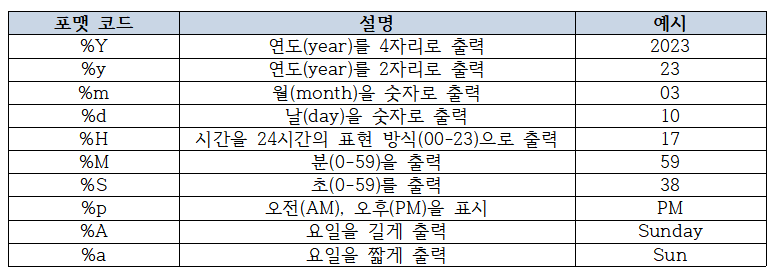

In [120]:
img_dir = "D:/OT 및 2주차/fig/"
Image(img_dir + "날짜 포맷 코드 정리.png")

#### 1) {Date} 와 {Datetime} : 시간대 존재 여부의 차이

In [121]:
time1 = datetime.date(2023,3,10)
print(time1) ; type(time1)

2023-03-10


datetime.date

In [122]:
time2 = datetime.datetime(2023, 3, 10, 11, 5, 36)
print(time2) ; type(time2)

2023-03-10 11:05:36


datetime.datetime

#### 2) {Timestamp} : pandas 모듈에서 생성
 - str값으로 넣어주어야 함

In [123]:
time3 = pd.Timestamp('2023-03-10T11:05:36')
print(time3) ; type(time3)

2023-03-10 11:05:36


pandas._libs.tslibs.timestamps.Timestamp

#### 3) 세 가지의 날짜 관련 타입은 비슷한 듯 보이지만 다름
 - 같은 시간일 경우, 다른 타입이어도 같은 것으로 인식됨

In [124]:
time1 == time2

False

In [125]:
time2 == time3

True

#### 4) 타입 변환하기

- Date/Timestamp to Datetime <br>
 :  * 반드시 입력값 형태와 같은 format을 입력해야하고 문자열(str) 형식으로 넣어주어야 함 : strftime() / isoformat() *

In [126]:
datetime.datetime.strptime(time1.strftime('%Y-%m-%d'), '%Y-%m-%d')
datetime.datetime.strptime(time3.isoformat(), '%Y-%m-%dT%H:%M:%S')

datetime.datetime(2023, 3, 10, 11, 5, 36)

- Datetime/Timestamp to Date : datetime에서 date() 를 붙이면 됨

In [127]:
time1 == time2

False

In [128]:
datetime.datetime.strptime(time1.strftime('%Y-%m-%d'), '%Y-%m-%d').date()
datetime.datetime.strptime(time3.isoformat(), '%Y-%m-%dT%H:%M:%S').date()

datetime.date(2023, 3, 10)

In [129]:
datetime.datetime(2023, 3, 10, 11, 5, 36) == pd.Timestamp('2023-03-10T11:05:36') 

True

In [130]:
time2 

datetime.datetime(2023, 3, 10, 11, 5, 36)

- Date/Datetime to Timestamp

In [131]:
pd.to_datetime(time1)
pd.to_datetime(time2)

Timestamp('2023-03-10 11:05:36')

### > 결측치 생성하기

- 변수별 결측치 확인

In [132]:
df_lg.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

- 행 인덱스를 추출하여 임의로 결측치 생성하기

In [133]:
# iloc('integer location'의 약자)
df_lg = df_lg.loc[:, ['Adj Close']] 

In [134]:
df_lg.head()

,Adj Close
Date,
2021-01-04,858233.0000
2021-01-05,862094.5625
2021-01-06,859198.3750
2021-01-07,928706.5625
2021-01-08,964426.0625


In [135]:
df_lg.shape
#len(df_lg)

(492, 1)

In [136]:
df_lg.reset_index(drop = False, inplace = True) 

In [141]:
df_NaN = df_lg.sample(n = int(len(df_lg) * 0.05), random_state = 23310)
df_NaN.index

Int64Index([152, 372, 104, 232, 390, 467,  92, 451,  57, 459, 194, 301, 176,
            182, 417, 124, 107, 160, 305, 474, 167, 463, 382,  72],
           dtype='int64')

In [139]:
df_lg.index in df_NaN.index

TypeError: unhashable type: 'RangeIndex'